In [1]:
import pickle

In [2]:
clf_alc = pickle.load(open('clf_alc_UPDATED.p', 'rb'))

In [6]:
clf_alc.steps[0][1].transformer_list

[('text',
  Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=71233, min_df=1,
          ngram_range=(2, 5), norm='l2', preprocessor=None, smooth_idf=True,
          stop_words=None, strip_accents=None, sublinear_tf=False,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
          vocabulary=None))]))]

In [7]:

%%time

from data import DataAccess, LabelGetter

X = DataAccess.get_not_labeled()

Wall time: 26.5 s


In [16]:
%%time
Labeled = DataAccess.get_as_dataframe()
L = LabelGetter(Labeled)

Wall time: 4.24 s


In [40]:
Labeled[Labeled.predict>0.9].head()

,created_at,labels,predict,text,user,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.statuses_count,user.verified
_id,,,,,,,,,,,
556fcf42d6dfbb18aa7dbbd5,Thu Jun 04 04:09:11 +0000 2015,"{'first_person_level': 1, 'first_person': 1, '...",0.912811,I'mma get drunk tomorrow,"{'friends_count': 1301, 'followers_count': 229...",Fri Jun 24 03:13:44 +0000 2011,1352,2293,1301,74362,False
55711a08d6dfbb62ba96dc0c,Fri Jun 05 03:40:30 +0000 2015,"{'raw': 'Alcohol Related::Discussion', 'alcoho...",0.915949,Yeah JR drunk,"{'friends_count': 875, 'followers_count': 1624...",Fri Aug 31 21:52:32 +0000 2012,2959,1624,875,62069,False
5571dfc6d6dfbb1e027878d5,Fri Jun 05 17:44:12 +0000 2015,"{'first_person': 1, 'alcohol': 1, 'first_perso...",0.935561,I got drunk off of one beer and one mojito las...,"{'friends_count': 214, 'followers_count': 224,...",Wed Dec 09 23:33:33 +0000 2009,7228,224,214,9191,False
5572447ad6dfbb440ea6c739,Sat Jun 06 00:53:53 +0000 2015,"{'first_person_level': 1, 'first_person': 1, '...",0.909894,I guess imma get drunk tonight 😈,"{'friends_count': 1329, 'followers_count': 174...",Sat Aug 29 08:03:08 +0000 2009,1462,1749,1329,63996,False
5573cbdbd6dfbb5bc86e3da7,Sun Jun 07 04:43:46 +0000 2015,"{'first_person': 1, 'alcohol': 1, 'first_perso...",0.917836,Now I'm just chilling drinking a beer lol,"{'friends_count': 436, 'followers_count': 411,...",Fri Oct 14 17:12:54 +0000 2011,212,411,436,11938,False


In [17]:
clf_alc.fit(*L.get_alcohol())

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=T...one,
          solver='liblinear', tol=0.000655077907893521, verbose=0,
          warm_start=None))])

In [18]:
pickle.dump(clf_alc, open('clf_alc_UPDATED.p', 'wb'))

In [19]:
X.head()
X.shape

(76606, 4)

In [20]:
sample = X[X.random_number <0.05]
sample.shape

(9504, 4)

In [21]:
%%time
predictions_alc = clf_alc.predict_proba(sample)

Wall time: 7.18 s


In [27]:
import numpy as np
np.set_printoptions(suppress=True)
predictions_alc

array([[ 0.48240235,  0.51759765],
       [ 0.00042371,  0.99957629],
       [ 0.43185756,  0.56814244],
       ..., 
       [ 0.9817936 ,  0.0182064 ],
       [ 0.99814248,  0.00185752],
       [ 0.67729692,  0.32270308]])

In [24]:
predictions_alc.shape

(9504, 2)

In [56]:
predictions_alc[predictions_alc[:, 1]<0.3].shape

(6158, 2)

In [69]:
sample[(0.4 <sample.new_prob) & (sample.new_prob<0.6)]

,control,predict,random_number,text,new_prob
_id,,,,,
556e11a6d6dfbb4628810991,NaN,0.637300,0.048751,"""I'm a little drunk on you and high on summert...",0.517598
556e22f5d6dfbb50e34a6a63,NaN,0.533093,0.016574,Drinking an Eternal Sunshine With Lemons by @a...,0.568142
556e69a7d6dfbb123fe31ce8,NaN,0.522892,0.045380,Bartender's choice (floral + unusual) and I go...,0.525895
556e8decd6dfbb3061976b1a,NaN,0.672798,0.040047,drinking a monster at 1 am probably wasn't the...,0.413976
556f7756d6dfbb590629ec68,NaN,0.723571,0.047001,Not trying to start shit by why do most of y'a...,0.583619
557283ccd6dfbb6172a7429a,NaN,0.519926,0.041560,When I go to achievers for my sales next year ...,0.444722
5574cdbcd6dfbb571e3247ca,NaN,0.509180,0.048857,Drinking a Van de Velde Belgo-Pale Ale by @Ale...,0.460326
55754100d6dfbb775fb52508,NaN,0.557005,0.020059,Buy me a drank,0.503749
5575ff7fd6dfbb0c79710a9d,NaN,0.525517,0.043954,Pint night @PlanoGingerMan ready to try Curiou...,0.424432


In [61]:
import matplotlib.pylab as plt
import matplotlib as m
%matplotlib inline

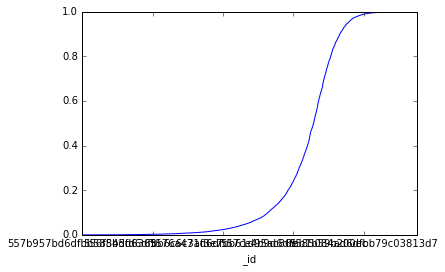

In [83]:
sample.sort_values('new_prob')['new_prob'].plot()

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
%%time
random_tweets = pd.read_csv('C:/Users/Tom Work/Downloads/random_tweets.csv', encoding='ISO-8859-1')

Wall time: 131 ms


In [4]:
random_tweets.head()

,Unnamed: 0,date,user_id,text,lat,lon,tweet_id
0,0,Thu May 12 14:38:08 +0000 2016,88181812,"Want to work in #Minden, LA? View our latest o...",32.595535,-93.338501,730769031607648258
1,1,Thu May 12 14:38:11 +0000 2016,23214609,"If you're a #Finance professional in #Irving, ...",32.891677,-96.947753,730769041917255685
2,2,Thu May 12 14:38:47 +0000 2016,3240877689,#AikenBluegrassFestival starts tomorrow and co...,33.549400,-81.720700,730769193247870976
3,3,Thu May 12 14:39:08 +0000 2016,399491030,We shopn u kno i go all n fo bdays ???? @ Detr...,42.447280,-83.094971,730769282741764097
4,4,Thu May 12 14:39:15 +0000 2016,34162397,This #Sales #job might be a great fit for you:...,41.823989,-71.412834,730769312391143427


In [5]:
clf_alc = pickle.load(open('clf_alc_UPDATED.p', 'rb'))

In [6]:
%%time
predictions_alc = clf_alc.predict_proba(random_tweets)

Wall time: 7.29 s


In [7]:
predictions_alc.shape

(9896, 2)

In [10]:
import numpy as np
np.set_printoptions(suppress=True)

In [11]:
predictions_alc

array([[ 0.96456856,  0.03543144],
       [ 0.92304535,  0.07695465],
       [ 0.01898568,  0.98101432],
       ..., 
       [ 0.98841572,  0.01158428],
       [ 0.09294404,  0.90705596],
       [ 0.99994688,  0.00005312]])

In [12]:
random_tweets['predict'] = predictions_alc[:, 1]

In [13]:
random_tweets.head()

,Unnamed: 0,date,user_id,text,lat,lon,tweet_id,predict
0,0,Thu May 12 14:38:08 +0000 2016,88181812,"Want to work in #Minden, LA? View our latest o...",32.595535,-93.338501,730769031607648258,0.035431
1,1,Thu May 12 14:38:11 +0000 2016,23214609,"If you're a #Finance professional in #Irving, ...",32.891677,-96.947753,730769041917255685,0.076955
2,2,Thu May 12 14:38:47 +0000 2016,3240877689,#AikenBluegrassFestival starts tomorrow and co...,33.549400,-81.720700,730769193247870976,0.981014
3,3,Thu May 12 14:39:08 +0000 2016,399491030,We shopn u kno i go all n fo bdays ???? @ Detr...,42.447280,-83.094971,730769282741764097,0.010153
4,4,Thu May 12 14:39:15 +0000 2016,34162397,This #Sales #job might be a great fit for you:...,41.823989,-71.412834,730769312391143427,0.001405


In [112]:
likely_alc = random_tweets[random_tweets.predict>0.95]
unlikely = random_tweets[random_tweets.predict<0.05]

In [35]:
import pprint

In [114]:
random_tweets[(0.4 <random_tweets.predict) & (random_tweets.predict<0.6)]

,Unnamed: 0,date,user_id,text,lat,lon,tweet_id,predict
10,10,Thu May 12 14:40:33 +0000 2016,2918919162,This #Education #job might be a great fit for ...,32.755488,-97.330766,730769639685267456,0.581696
30,30,Thu May 12 14:45:22 +0000 2016,43682934,"See our latest #Albuquerque, NM #job and click...",35.084889,-106.646815,730770850454994947,0.571120
40,40,Thu May 12 14:47:41 +0000 2016,22157598,This #Nursing #job might be a great fit for yo...,39.952584,-75.165222,730771434746699777,0.435139
57,57,Thu May 12 14:50:53 +0000 2016,14154809,"What took five hours up, takes five minutes do...",36.585449,-105.452076,730772240602566656,0.530978
76,76,Thu May 12 14:56:25 +0000 2016,3033896513,#FRESH for the next couple of days we're going...,43.650261,-79.388649,730773632587177986,0.453324
87,87,Thu May 12 14:58:40 +0000 2016,714734456,"thank you for everything, matthew????can't wai...",41.118822,-80.329580,730774198507966464,0.411075
96,96,Thu May 12 15:00:09 +0000 2016,30390487,OPUS Mag: 5th Session | Hip-Hop Mix by @Shoote...,40.720756,-74.000761,730774570144305153,0.550572
125,125,Thu May 12 15:06:14 +0000 2016,3307978892,It's a #Beautiful day to #ComeSeeUs and get so...,40.085631,-83.092364,730776100519956481,0.530007
160,160,Thu May 12 15:10:53 +0000 2016,21360919,I'm at Ernest Hemingway Home &amp; Museum in K...,24.551168,-81.800688,730777272232366080,0.410525
180,180,Thu May 12 15:15:08 +0000 2016,759953168,Can you recommend anyone for this #job? DSP (T...,39.843385,-74.710705,730778340928323584,0.427449


In [113]:
unlikely.head(10)

,Unnamed: 0,date,user_id,text,lat,lon,tweet_id,predict
0,0,Thu May 12 14:38:08 +0000 2016,88181812,"Want to work in #Minden, LA? View our latest o...",32.595535,-93.338501,730769031607648258,0.035431
3,3,Thu May 12 14:39:08 +0000 2016,399491030,We shopn u kno i go all n fo bdays ???? @ Detr...,42.447280,-83.094971,730769282741764097,0.010153
4,4,Thu May 12 14:39:15 +0000 2016,34162397,This #Sales #job might be a great fit for you:...,41.823989,-71.412834,730769312391143427,0.001405
6,6,Thu May 12 14:39:25 +0000 2016,59967225,STORE MANAGER - Dollar General Corporation: (#...,36.841456,-94.611057,730769352346062852,0.002453
9,9,Thu May 12 14:40:10 +0000 2016,64217534,Take a musical journey during Fort Worth Libra...,32.727913,-97.319470,730769540846485504,0.043897
11,11,Thu May 12 14:40:36 +0000 2016,52272942,Construction on #I278 WB from Queens-Kings Cou...,40.727600,-73.929199,730769650750005248,0.024176
13,13,Thu May 12 14:41:34 +0000 2016,14345629,"I'm at Starbucks in San Jose, CA https://t.co/...",37.341390,-121.911576,730769892933275649,0.000502
15,15,Thu May 12 14:41:49 +0000 2016,57569071,"#Healthcare in #Lebanon, PA: Pharmacy Technici...",40.340925,-76.411350,730769956938227713,0.001255
16,16,Thu May 12 14:41:49 +0000 2016,2904664975,#Hospitality #Job alert: Crew Member / Custome...,42.500324,-83.359781,730769959081545728,0.021222
17,17,Thu May 12 14:41:50 +0000 2016,23903548,Join the Citi team! See our latest #ProjectMgm...,32.814018,-96.948894,730769961891692544,0.013110


In [36]:
pprint.pprint(likely_alc.sample(10).text)

9226    i need to go on a 6 hour drive and just zone o...
8713    #HappyHour 2 for 1 ???? &amp; ???????? today a...
3546    A bro from Boston says to me, "Man they really...
2579    Cutting today 9am to 7pm.  Lunch from 1:30pm t...
8340    We're #hiring! Click to apply: Teller - Ewing,...
8683    Drinking a Brewed For Brazil Hoppy Wit by @Mik...
3473    Sweet. #bachelorette #rooftop #mydadisastud #t...
9383    thanks to @dotdothashtag and nybikejumble this...
7557    Keep It Loose, Keep It Tight by Amos Lee is #n...
5617    Noah's New York Bagel #Hospitality #Job: Baker...
Name: text, dtype: object


In [60]:
likely_alc.text.iloc[9
                    ]

'See our latest #PANAMACITY, FL #job and click to apply: Manager in Training (Panama... - https://t.co/odxLJvp2cc https://t.co/5vQcVFlTRc'

In [23]:
clf_alc.steps[0]

('features', FeatureUnion(n_jobs=1,
        transformer_list=[('text', Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=71233, min_df=1,
    ...      token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None))]))],
        transformer_weights=None))

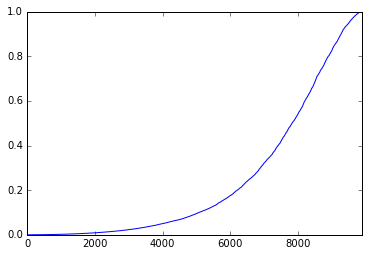

In [102]:
random_tweets.predict.sort_values().plot(use_index=False) # this curve doesn't mean anything

ValueError: This Series is a view of some other array, to sort in-place you must create a copy